In [153]:
import pandas as pd
import numpy as np
import math 
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [129]:
def dataset_generation(n):
  x=np.linspace(0,1,n,endpoint=False)
  y=[]
  for i in x:
    y.append(math.sin(2*math.pi*i)+random.normal(scale=0.3))
  return x,y

In [172]:
def gradient_decent(X,Y,theta,alpha):
  #theta=[1]*(trainX.shape[1])#making all possible theta for each columns it will be representing the coefficient of each column
  #alpha=0.05 #learning rate of learning
  x=100
  m=len(Y)
  while x>0:
    temp=[0]*(len(X[0]))#this is sort of temp variable used to store the new values of theta
    #print(X.shape)
    for i in range(len(X[0])):
      xs=[]
      for j in X:
       xs.append(j[i])
      prod=np.matmul(X,theta)
      sumation=sum((prod-Y)*xs)
      temp[i]=alpha*(1/m)*(sumation)
    for i in range(len(theta)):
      theta[i]-= temp[i] 
    x-=1   #for x--  
  return theta 

In [173]:
def generate_phi_n(X,n):
  arr=[]#this will store the phi n values
  for i in range(len(X)):#here we are generating the 1 + x^1 + x^2 + .......+x^n for each value in X
    temp=[]
    init=1
    for j in range(int(n)+1):
      temp.append(init)
      init=init*X[i]
    arr.append(temp)
  return arr   

In [174]:
def gradient_descent_upto_n(X,Y,alpha):
  theta_values=[0]*(10)
  theta_list=[]
  for i in range(1,10):
    Xi=generate_phi_n(X,i)
    theta_permitted=theta_values[:i+1]
    theta=gradient_decent(Xi,Y,theta_permitted,alpha)
    theta_list.append(theta)
  return theta_list


In [175]:
def making_plot(train_X,train_Y,test_X,test_Y,theta):
  plt.scatter(train_X,train_Y,color='r',label='training output')
  plt.scatter(test_X,test_Y,color='g',label='testing output')
  x=np.linspace(0,1,100)
  x=x.tolist()
  for i in range(1,10):
    x_val=generate_phi_n(x,i)
    yi=np.matmul(x_val,theta[i-1])
    plt.plot(x, yi,color='b',)
  plt.xlabel("X-values")
  plt.ylabel("Y-values")
  plt.legend(loc='upper right')
  plt.show()


In [176]:
def plot_for_square_error(train_X,train_Y,test_X,test_Y,theta):
    x=[]
    y_train=[]
    y_test=[]
    for i in range(1,10):
      x.append(i)
      train_error=mean_squared_error(train_Y,np.matmul(generate_phi_n(train_X,i),theta[i-1]))
      y_train.append(train_error)
      test_error=mean_squared_error(test_Y,np.matmul(generate_phi_n(test_X,i),theta[i-1]))
      y_test.append(test_error)
    plt.scatter(x,y_test,color='g',label="test MSE")
    plt.scatter(x,y_train,color='y',label="train MSE")
    plt.plot(x, y_test,color='g')
    plt.plot(x, y_train,color='y')
    plt.xlabel('Value of N')
    plt.ylabel('MeanSquaredError')
    plt.legend(loc='upper right')
    plt.show()  

# For n=10

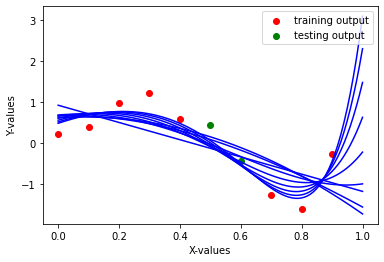

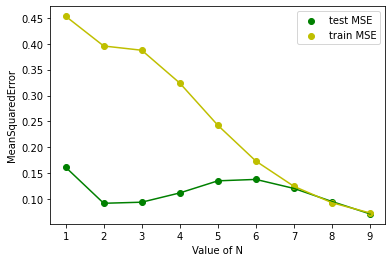

In [167]:
X,Y=dataset_generation(10)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)
n_train=int(0.8*n)
n_test=int(0.2*n)
theta_values=[]
# print(train_x.shape)
theta_values=gradient_descent_upto_n(train_x,train_y,0.05)
# print(theta_values)
making_plot(train_x,train_y,test_x,test_y,theta_values)
plot_for_square_error(train_x,train_y,test_x,test_y,theta_values)

# For N=100


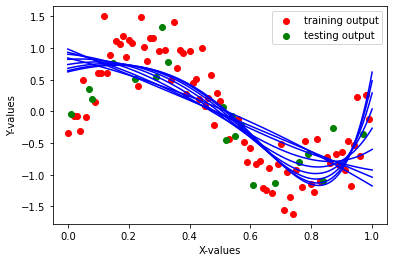

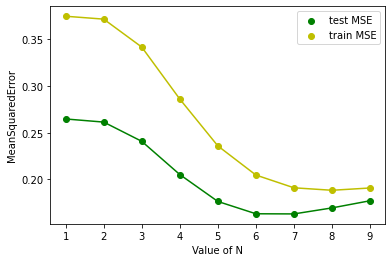

In [168]:
X,Y=dataset_generation(100)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)
theta_values=[]
# print(train_x.shape)
theta_values=gradient_descent_upto_n(train_x,train_y,0.05)
# print(theta_values)
making_plot(train_x,train_y,test_x,test_y,theta_values)
plot_for_square_error(train_x,train_y,test_x,test_y,theta_values)

# For n=1000

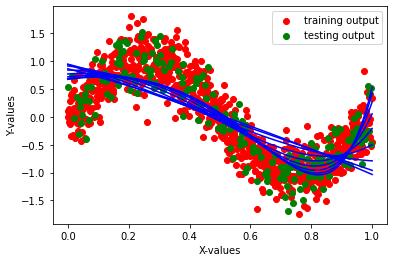

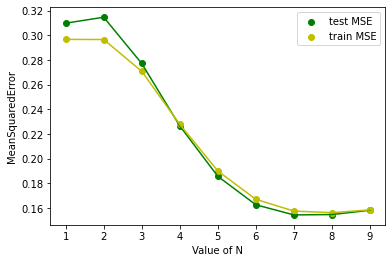

In [169]:
X,Y=dataset_generation(1000)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)
n_train=int(0.8*n)
n_test=int(0.2*n)
theta_values=[]
# print(train_x.shape)
theta_values=gradient_descent_upto_n(train_x,train_y,0.05)
# print(theta_values)
making_plot(train_x,train_y,test_x,test_y,theta_values)
plot_for_square_error(train_x,train_y,test_x,test_y,theta_values)

n=10000

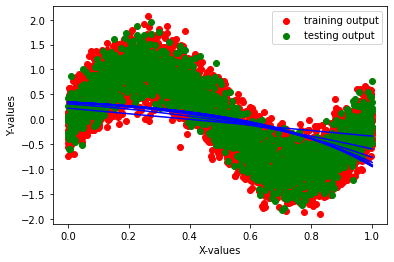

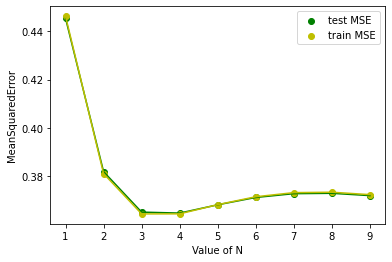

In [177]:
X,Y=dataset_generation(10000)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)
n_train=int(0.8*n)
n_test=int(0.2*n)
theta_values=[]
# print(train_x.shape)
theta_values=gradient_descent_upto_n(train_x,train_y,0.05)
# print(theta_values)
making_plot(train_x,train_y,test_x,test_y,theta_values)
plot_for_square_error(train_x,train_y,test_x,test_y,theta_values)

# 4)LOGISTIC REGRESSION

In [253]:
import sklearn
from sklearn.datasets import load_breast_cancer
Data=sklearn.datasets.load_breast_cancer()

X=Data.data
Y=Data.target

def sigmoid(z):
  return 1/(1+np.exp(-z))

def Logistic_Regression(X,Y,theta,alpha):
  x=1000
  m=len(Y)
  while x>0:
    temp=[0]*(len(X[0]))#this is sort of temp variable used to store the new values of theta
    #print(X.shape)
    for i in range(len(X[0])):
      xs=[]
      for j in X:
       xs.append(j[i])
      # print("shape of X",X.shape) 
      # print("shape of theta,",theta.shape)
      prod=np.matmul(X,theta) 
      hypothesis=[]
      for row in prod:
        hypothesis.append(sigmoid(row))
      sumation=sum((hypothesis-Y)*xs)
      temp[i]=alpha*(1/m)*(sumation)
    for i in range(len(theta)):
      theta[i]-= temp[i] 
    x-=1   #for x--  
  return theta 

def predict_value(X,theta):
  prod=np.matmul(X,theta)
  y_predicted=[]
  for row in prod:
    hypo=sigmoid(row)
    if hypo<0.5:
      y_predicted.append(0)
    if hypo>=0.5:
      y_predicted.append(1)
  return y_predicted  
  
def Accuraccy(X,Y,theta):
  y_predicted=predict_value(X,theta)
  x=0
  for i in range(len(y_predicted)):
    if (y_predicted[i]==Y[i]):
      x+=1
  print((x/len(y_predicted))*100,"%")
  return (x/len(y_predicted))*100


In [260]:
def training_n_testing(X,Y,test_size):
  train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=test_size)
  print(train_X.shape)
  print(train_Y.shape)
  initial_theta = np.ones(train_X.shape[1])
  #print(initial_theta)
  theta=Logistic_Regression(train_X,train_Y,initial_theta,0.005)
  print("training accuraccy:")
  training_acc=Accuraccy(train_X,train_Y,theta)
  print("testing_accuraccy:")
  testing_acc=Accuraccy(test_X,test_Y,theta)
  return training_acc,testing_acc

In [263]:
output=[]
print("when training data set is 10%")
output.append(training_n_testing(X,Y,0.9))
print("when training data set is 20%")
output.append(training_n_testing(X,Y,0.8))
print("when training data set is 30%")
output.append(training_n_testing(X,Y,0.7))
print("when training data set is 40%")
output.append(training_n_testing(X,Y,0.6))
print("when training data set is 50%")
output.append(training_n_testing(X,Y,0.5))
print("when training data set is 60%")
output.append(training_n_testing(X,Y,0.4))
table = pd.DataFrame(output, columns=['Training Accuracy', 'Testing Accuracy'], index=['10%', '20%', '30%', '40%', '50%', '60%'])
table.head(6)
print(table)
table.to_csv('training_n_testing_accuracy.csv')


when training data set is 10%
(56, 30)
(56,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


training accuraccy:
0.875 %
testing_accuraccy:
0.9064327485380117 %
when training data set is 20%
(113, 30)
(113,)
training accuraccy:
0.9026548672566371 %
testing_accuraccy:
0.9166666666666666 %
when training data set is 30%
(170, 30)
(170,)
training accuraccy:
0.9 %
testing_accuraccy:
0.9047619047619048 %
when training data set is 40%
(227, 30)
(227,)
training accuraccy:
0.9118942731277533 %
testing_accuraccy:
0.9093567251461988 %
when training data set is 50%
(284, 30)
(284,)
training accuraccy:
0.8274647887323944 %
testing_accuraccy:
0.8 %
when training data set is 60%
(341, 30)
(341,)
training accuraccy:
0.9090909090909091 %
testing_accuraccy:
0.9342105263157895 %
     Training Accuracy  Testing Accuracy
10%          87.500000         90.643275
20%          90.265487         91.666667
30%          90.000000         90.476190
40%          91.189427         90.935673
50%          82.746479         80.000000
60%          90.909091         93.421053
